# Regressão Linear 

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

## Leitura de dados

In [144]:
df = pd.read_csv('arquivos/imoveis.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [145]:
# Transfirmando codigo de bairro para categórico
df['codigo_bairro'] = df['codigo_bairro'].astype('category')

## Grafico de Dispersão

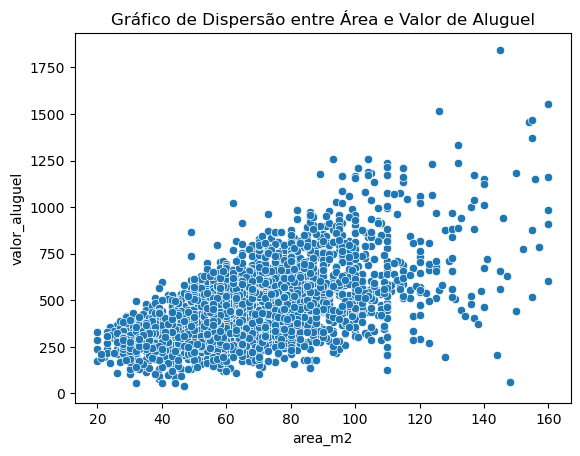

In [146]:
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')
plt.title('Gráfico de Dispersão entre Área e Valor de Aluguel')
plt.show()

## Construção do Modelo OLS (Ordinary Least Squares) com Statsmodels 

In [150]:
# Variável dependente
y = df['valor_aluguel']
# Variável independente
X = df['area_m2']

# O statsmodel requer que a variável independente tenha uma constante
X = sm.add_constant(X)

X.head()

,const,area_m2
0,1.0,35
1,1.0,104
2,1.0,29
3,1.0,39
4,1.0,97


In [151]:
# Criando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

resultado = modelo.summary()

print(resultado)

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Fri, 09 May 2025   Prob (F-statistic):          6.84e-275
Time:                        19:20:43   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

R² = 0.342 indica que o modelo não é suficiente para explicar a variação dos dados.
p-value < 0.05 indica que a variável área é estatisticamente significativa.

Text(0.5, 1.0, 'Gráfico de Dispersão entre Área e Valor de Aluguel com Regressão Linear')

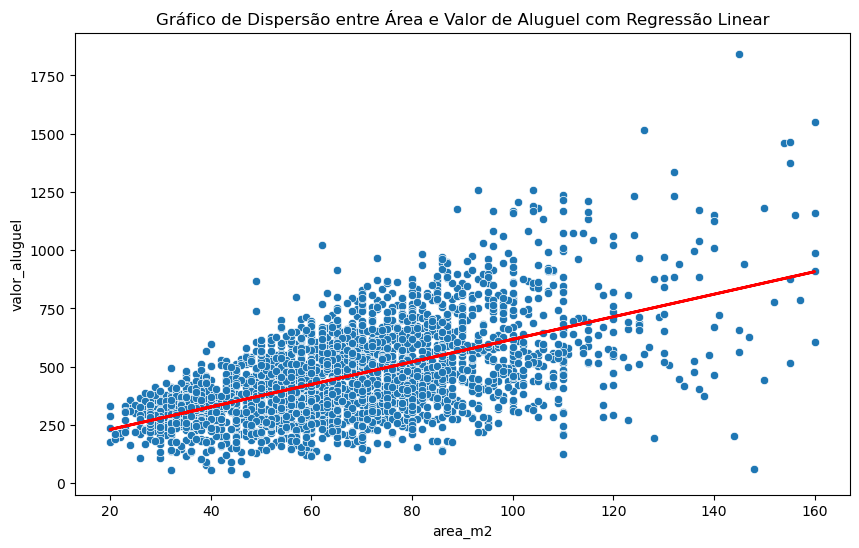

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')
plt.plot(df['area_m2'], modelo.predict(X), color='red', linewidth=2)
plt.title('Gráfico de Dispersão entre Área e Valor de Aluguel com Regressão Linear')

## Regressão Linear Múltipla

 Testando a influência de outras variáveis (Número de banheiros, número de cozinhas e ano de construção)

In [154]:
# Variável dependente
y = df['valor_aluguel']
# Variáveis independentes
X = df[['area_m2', 'numero_banheiros', 'numero_cozinhas', 'ano_construcao']]
# O statsmodel requer que a variável independente tenha uma constante
X = sm.add_constant(X)
# Criando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()
resultado = modelo.summary()
print(resultado)

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     585.9
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        19:22:27   Log-Likelihood:                -19222.
No. Observations:                3000   AIC:                         3.845e+04
Df Residuals:                    2995   BIC:                         3.848e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4401.2002    247.186  

 O modelo de regressão melhorou com a inclusão de mais variáveis independentes, pois o R² aumentou de 0.43.
 Todas as variáveis incluidas no modelo foram significativas, com p-valor < 0,05.

## Regressão Linear Múltipla com variável categórica

# Análise dos resíduos

In [112]:
residuos = modelo.resid

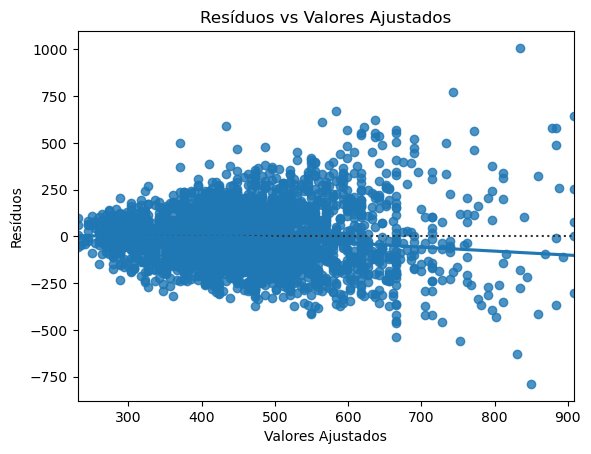

In [113]:
sns.residplot(x=modelo.fittedvalues, y=residuos, lowess=True)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

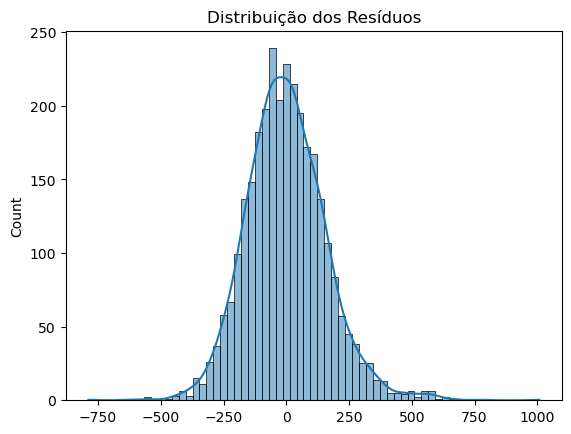

In [114]:
# Histograma
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()


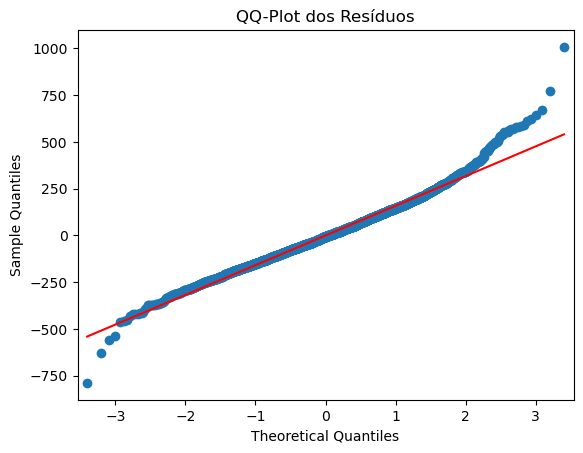

In [115]:
# QQ-plot
sm.qqplot(residuos, line='s')
plt.title('QQ-Plot dos Resíduos')
plt.show()

In [116]:
from scipy.stats import shapiro
stat, p = shapiro(residuos)
print(f'Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}')

Shapiro-Wilk: stat=0.984, p=0.000


O teste Shapiro-wilk apresentou um p-valor o-valor < 0,05, ou seja, os resíduos não seguem uma distribuição normal, 
o que viola uma das suposições da regressão linear clássica.


In [117]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuos, modelo.model.exog)

nomes = ['LM', 'LM p-valor', 'F', 'F p-valor']
print(dict(zip(nomes, bp_test)))

{'LM': 442.0040697442159, 'LM p-valor': 3.9653874866614945e-98, 'F': 518.0337409530804, 'F p-valor': 6.540558519275268e-106}


O teste de Homocedasticidade rejeita a hipoótese nula (p-valor<  0,05), ou seja, o modelo apresenta heterocedasticidade,  a variância dos erros não é constante, isso viola outra suposição da regressão linear.

**Concluíndo, com base no gráfico de resíduos e nos resultados dos testes:** 
O teste mostra heterocedasticidade e o gráfico moatra que os resíduos aumentam com os valores ajustados.
O teste de Shapiro-Wilk também indicou não normalidade dos resíduos.
Ainda assim, todas as variáveis do modelo são estatisticamente significativas (p-valor < 0.05).
O modelo está capturando parte da estrutura dos dados, mas as suposições de normalidade e homocedasticidade estão sendo violadas

## Aplicando transformação na variável dependente

### Transformação box-cox

In [118]:
from scipy.stats import boxcox
y_boxcox, lambda_bc = boxcox(y)

lambda_bc

0.22674380888719198

In [119]:
modelo2 = sm.OLS(y_boxcox, X).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     1386.
Date:                Fri, 09 May 2025   Prob (F-statistic):          9.02e-250
Time:                        10:53:47   Log-Likelihood:                -5223.9
No. Observations:                3000   AIC:                         1.045e+04
Df Residuals:                    2998   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3575      0.076    136.205      0.0

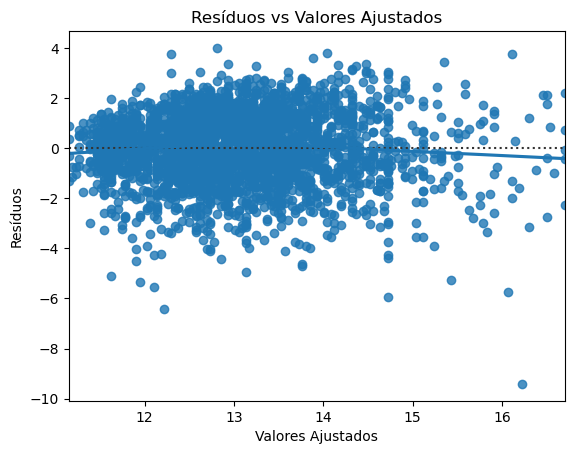

In [120]:
residuos2 = modelo2.resid
sns.residplot(x=modelo2.fittedvalues, y=residuos2, lowess=True)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

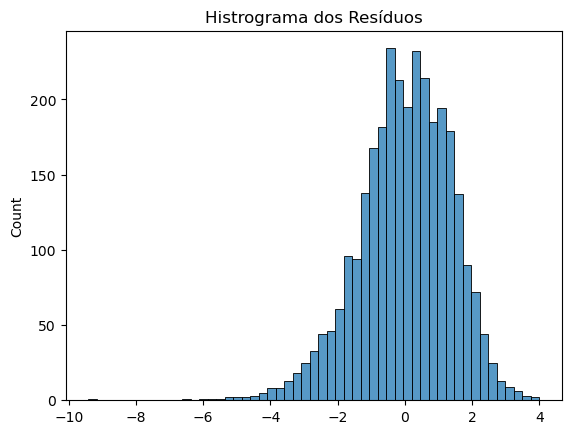

In [127]:
plt.title('Histrograma dos Resíduos')
sns.histplot(residuos2)
plt.show()

In [121]:
bp_test = het_breuschpagan(residuos2, modelo2.model.exog)
print(dict(zip(nomes, bp_test)))

{'LM': 78.32512436490924, 'LM p-valor': 8.740310091802997e-19, 'F': 80.37127087761782, 'F p-valor': 5.336943214454072e-19}


In [123]:
stat, p = shapiro(residuos2)
print(f'Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}')

Shapiro-Wilk: stat=0.983, p=0.000


Com a transformação box-cox foi possível corrigir a heterocedasticidade (p-valor > 0.05), porém a suposição de normalidade dos resíduos continua sendo violada (p-valor < 0.05).

### Regressão com erros padrão robustos

In [99]:
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     346.8
Date:                Fri, 09 May 2025   Prob (F-statistic):          1.32e-245
Time:                        09:51:11   Log-Likelihood:                -19222.
No. Observations:                3000   AIC:                         3.845e+04
Df Residuals:                    2995   BIC:                         3.848e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4401.2002    282.634  